## RAG Pipeline Optimization Finding

### Import Packages

In [32]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('../scripts')))

In [33]:
from rag_evaluation import RagEvaluation
from rag_pipeline import RagPipeline

In [34]:
from chunking import Chunking, ChunkingStrategy
from databases import VectorStoreFactory, VectorStore
from embedding import EmbeddingFactory, EmbeddingType
from memory import MemoryFactory, MemoryType
from retrivers import RetrieverFactory, RetrieverType

In [35]:
chuncking_options = [ enum_type for enum_type in ChunkingStrategy]
embedding_options = [ enum_type for enum_type in EmbeddingType]
memoryType_options = [ enum_type for enum_type in MemoryType]
retrieverType_options = [ enum_type for enum_type in RetrieverType]
vectorStore_options = [ enum_type for enum_type in VectorStore]


In [36]:
memoryType_options

[<MemoryType.CONVERSATION_BUFFER: 'Conversation Buffer'>,
 <MemoryType.CONVERSATION_BUFFER_WINDOW: 'Conversation Buffer Window'>,
 <MemoryType.CONVERSATION_SUMMARY: 'Conversation Summary'>,
 <MemoryType.CONVERSATION_SUMMARY_BUFFER: 'Conversation Summary Buffer'>,
 <MemoryType.CONVERSATION_KNOWLEDGE_GRAPH: 'Conversation Knowledge Graph'>]

In [55]:
context_path = "../data/Evaluation Sets/Raptor Contract.docx"
question_ans_path = "../data/Evaluation Sets/Raptor Q&A2.docx"

rag_eval = RagEvaluation(
    context_path=context_path,
    question_ans_path=question_ans_path,
    chunking_strategy=chuncking_options[1],
    embedding_model=embedding_options[0],
    memory_type=memoryType_options[0],
    retrieve_type=retrieverType_options[0],
    vector_store=vectorStore_options[0],
)


ragas_dataset = rag_eval.create_ragas_dataset()
rag_eval_metrics_dict = rag_eval.evaluate_dataset(ragas_dataset)

2024-02-26 04:24:02,127:logger:ChromaDB vectorstore created successfully.
2024-02-26 04:24:02,129:logger:parent document retriever created successfully.
2024-02-26 04:24:02,159:logger:langchain with rag pipeline created successfully.


<class 'langchain_community.embeddings.openai.OpenAIEmbeddings'> text-embedding-ada-002


Created a chunk of size 2970, which is longer than the specified 500
Created a chunk of size 2451, which is longer than the specified 500
Created a chunk of size 35794, which is longer than the specified 500
Created a chunk of size 3421, which is longer than the specified 500
Created a chunk of size 10245, which is longer than the specified 500
Created a chunk of size 7692, which is longer than the specified 500
Created a chunk of size 7006, which is longer than the specified 500
Created a chunk of size 43008, which is longer than the specified 500
Created a chunk of size 47900, which is longer than the specified 500
Created a chunk of size 4614, which is longer than the specified 500
Created a chunk of size 2704, which is longer than the specified 500
Created a chunk of size 12814, which is longer than the specified 500
Created a chunk of size 3279, which is longer than the specified 500
Created a chunk of size 3111, which is longer than the specified 500
Created a chunk of size 2330,

In [38]:
res = {
    "context_path":context_path,
    "question_ans_path":question_ans_path,
    "chunking_strategy":chuncking_options[1].name,
    "embedding_model":embedding_options[0].name,
    "memory_type":memoryType_options[0].name,
    "retrieve_type":retrieverType_options[0].name,
    "vector_store":vectorStore_options[0].name,
}
res.update(rag_eval_metrics_dict.copy())
res


{'context_path': '../data/Evaluation Sets/Raptor Contract.docx',
 'question_ans_path': '../data/Evaluation Sets/Raptor Q&A2.docx',
 'chunking_strategy': 'RECURSIVE',
 'embedding_model': 'OPENAI_EMBEDDING',
 'memory_type': 'CONVERSATION_BUFFER',
 'retrieve_type': 'PARENT_DOCUMENT',
 'vector_store': 'CHROMA',
 'context_precision': 0.2857142856892857,
 'faithfulness': 0.8333333333333334,
 'answer_relevancy': 0.5418264884710424,
 'context_recall': 0.8571428571428571,
 'context_relevancy': 0.49523809523809526,
 'answer_correctness': 0.3863195330430707,
 'answer_similarity': 0.7911964995192214}

In [39]:
import pandas as pd

res = [
    {'context_path': '../data/Evaluation Sets/Raptor Contract.docx',
 'question_ans_path': '../data/Evaluation Sets/Raptor Q&A2.docx',
 'chunking_strategy': 'NAIVE',
 'embedding_model': 'OPENAI_EMBEDDING',
 'memory_type': 'CONVERSATION_BUFFER',
 'retrieve_type': 'PARENT_DOCUMENT',
 'vector_store': 'CHROMA',
 'context_precision': 0.46428571425,
 'faithfulness': 0.8727272727272727,
 'answer_relevancy': 0.8362581056038787,
 'context_recall': 0.7057142857142856,
 'context_relevancy': 0.06421179732341606,
 'answer_correctness': 0.5523582405340776,
 'answer_similarity': 0.8017047076848599},
 
 {'context_path': '../data/Evaluation Sets/Raptor Contract.docx',
 'question_ans_path': '../data/Evaluation Sets/Raptor Q&A2.docx',
 'chunking_strategy': 'RECURSIVE',
 'embedding_model': 'OPENAI_EMBEDDING',
 'memory_type': 'CONVERSATION_BUFFER',
 'retrieve_type': 'PARENT_DOCUMENT',
 'vector_store': 'CHROMA',
 'context_precision': 0.2857142856892857,
 'faithfulness': 0.8333333333333334,
 'answer_relevancy': 0.5418264884710424,
 'context_recall': 0.8571428571428571,
 'context_relevancy': 0.49523809523809526,
 'answer_correctness': 0.3863195330430707,
 'answer_similarity': 0.7911964995192214},

 
    {'context_path': '../data/Evaluation Sets/Raptor Contract.docx',
 'question_ans_path': '../data/Evaluation Sets/Raptor Q&A2.docx',
 'chunking_strategy': 'SEMANTIC',
 'embedding_model': 'OPENAI_EMBEDDING',
 'memory_type': 'CONVERSATION_BUFFER',
 'retrieve_type': 'PARENT_DOCUMENT',
 'vector_store': 'CHROMA',
 'context_precision': 0.5357142856761905,
 'faithfulness': 0.8973214285714286,
 'answer_relevancy': 0.7780524315353344,
 'context_recall': 0.5714285714285714,
 'context_relevancy': 0.027480336077916327,
 'answer_correctness': 0.48340884620840047,
 'answer_similarity': 0.797617138489872},

]

df = pd.DataFrame(res)


In [52]:
df.to_csv("chunking_options.csv")

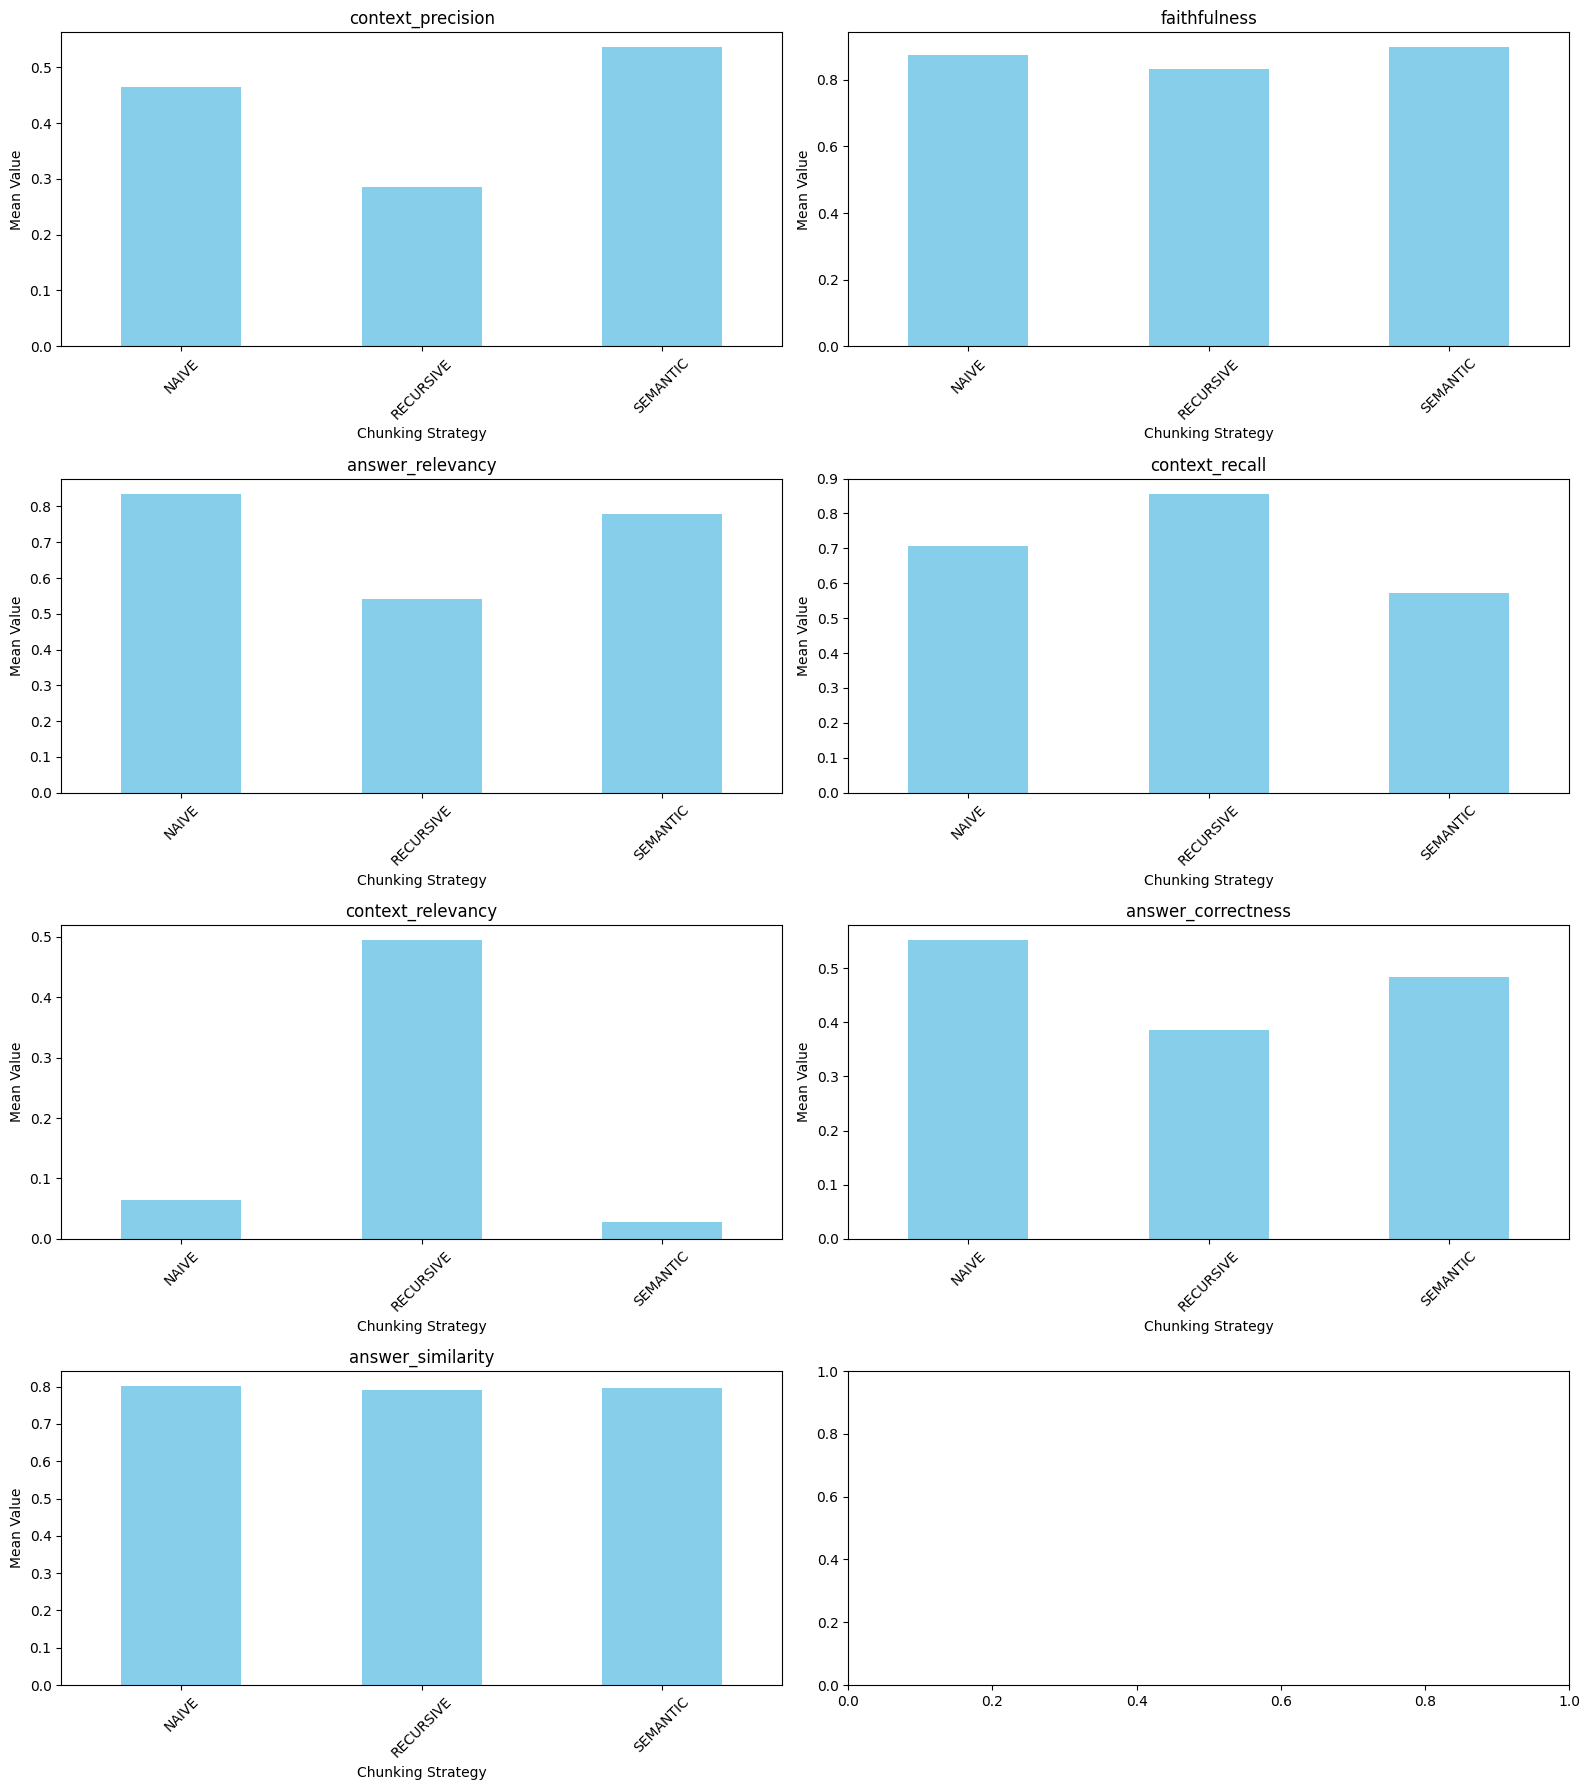

In [45]:
import matplotlib.pyplot as plt

# Grouping the dataframe by 'chunking_strategy'
cols = ['chunking_strategy', 'context_precision', 'faithfulness', 'answer_relevancy', 'context_recall', 
           'context_relevancy', 'answer_correctness', 'answer_similarity']

selected_df = df[cols]
grouped_df = selected_df.groupby('chunking_strategy').mean()

# Metrics to plot
metrics = ['context_precision', 'faithfulness', 'answer_relevancy', 'context_recall', 
           'context_relevancy', 'answer_correctness', 'answer_similarity']

# Plotting
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 18))
fig.subplots_adjust(hspace=0.5)

for i, metric in enumerate(metrics):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    grouped_df[metric].plot(kind='bar', ax=ax, color='skyblue')
    ax.set_title(metric)
    ax.set_ylabel('Mean Value')
    ax.set_xlabel('Chunking Strategy')
    ax.set_xticklabels(grouped_df.index, rotation=45)
    
plt.tight_layout()
plt.show()


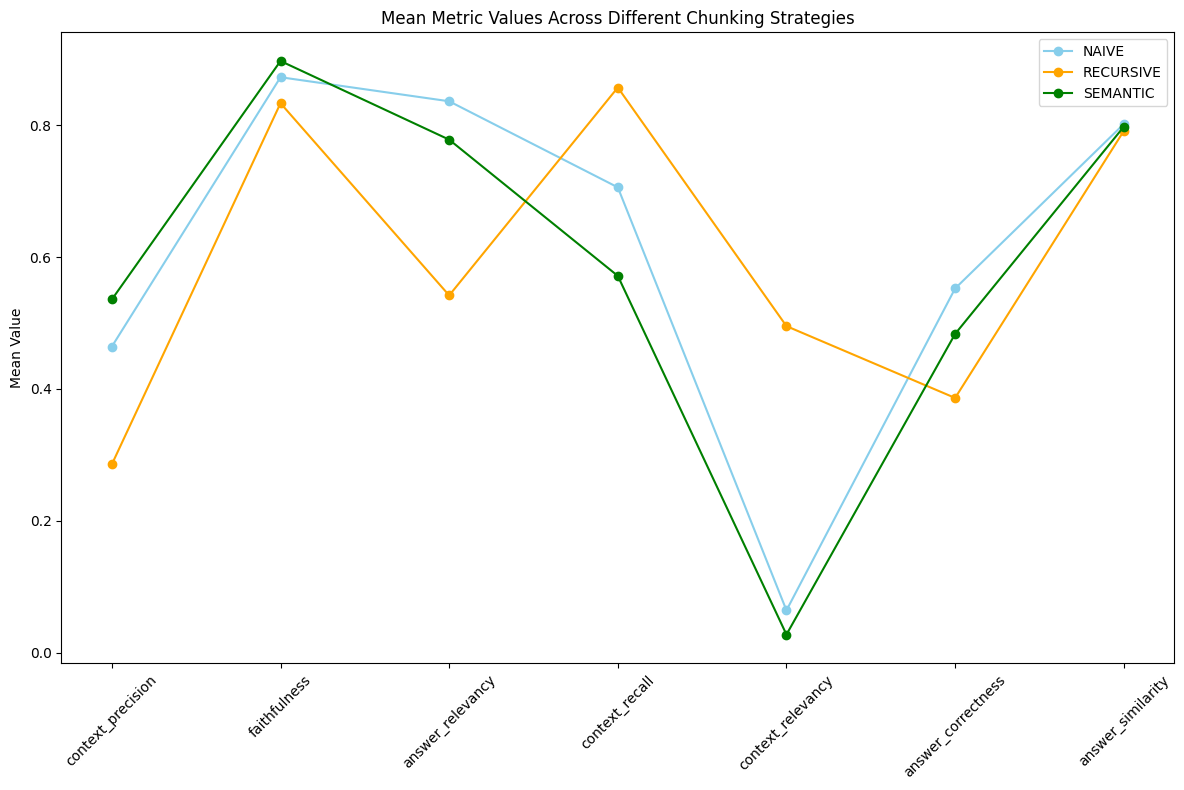

In [50]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 8))

# Colors for each chunking strategy
colors = ['skyblue', 'orange', 'green']

# Plotting each chunking strategy as a line
for j, (strategy, strategy_data) in enumerate(selected_df.groupby('chunking_strategy')):
    ax.plot(metrics, strategy_data[metrics].values[0], marker='o', label=strategy, color=colors[j])

# Set x-axis labels and tick positions
ax.set_xticks(np.arange(len(metrics)))
ax.set_xticklabels(metrics, rotation=45)

# Set y-axis label
ax.set_ylabel('Mean Value')

# Add legend
ax.legend()

# Set plot title
ax.set_title('Mean Metric Values Across Different Chunking Strategies')

plt.tight_layout()
plt.show()
